In [ ]:
pip install gdown

In [ ]:
pip install python-louvain

In [3]:
import pandas as pd
import gdown
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import community.community_louvain as community_louvain

In [4]:
# File ID from Google Drive
file_id = '1v6joXmQnknrFouwP0-kJvIgl_A8UZl7E'

# Construct the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Output file names
downloaded_file = 'waze_data'
csv_output = 'cleaned_waze_app_dataset.csv'

# Download the file using gdown
gdown.download(download_url, downloaded_file, quiet=False)

try:
    # Try to load the file as an Excel file
    waze_data_df = pd.read_excel(downloaded_file, engine='openpyxl')
except Exception as e:
    print("Error reading as Excel, trying as CSV:", e)
    # Try to read as CSV
    waze_data_df = pd.read_csv(downloaded_file)

waze_data_df.head()

Downloading...
From: https://drive.google.com/uc?id=1v6joXmQnknrFouwP0-kJvIgl_A8UZl7E
To: /content/waze_data
100%|██████████| 1.20M/1.20M [00:00<00:00, 91.1MB/s]


Error reading as Excel, trying as CSV: File is not a zip file


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
# Clean the dataset by dropping rows with missing 'label'
dataset_cleaned = waze_data_df.dropna(subset=['label']).copy()

# Remove the 'sessions' column (stay with the 'total_sessions')
dataset_cleaned = dataset_cleaned.drop(columns=['sessions'])

# Drop rows with "n_days_after_onboarding" under 2 years (730 days)
dataset_cleaned = dataset_cleaned[dataset_cleaned['n_days_after_onboarding'] > 730]

# Drop rows with "drives" (last month) equals to 0 or under 50
dataset_cleaned = dataset_cleaned[dataset_cleaned['drives'] != 0]
dataset_cleaned = dataset_cleaned[dataset_cleaned['drives'] > 20]

# Drop rows with "total_sessions" (total) under 50
dataset_cleaned = dataset_cleaned[dataset_cleaned['total_sessions'] > 50]

# Drop rows with "driven_km_drives" (total) under 200
dataset_cleaned = dataset_cleaned[dataset_cleaned['driven_km_drives'] > 200]

# Drop rows with "duration_minutes_drives" (last month) under 2 hours (120 minutes)
dataset_cleaned = dataset_cleaned[dataset_cleaned['duration_minutes_drives'] > 120]

# Drop rows with "activity_days" (last month) equals to 0
dataset_cleaned = dataset_cleaned[dataset_cleaned['activity_days'] != 0]

# Drop rows with "driving_days" (last month) equals to 0
dataset_cleaned = dataset_cleaned[dataset_cleaned['driving_days'] != 0]

# Get the number of records
num_records = len(dataset_cleaned)
print(f"Number of records after cleaning: {num_records}")

# Export to CSV
dataset_cleaned.to_csv(csv_output, index=False)
print(f"The cleaned dataset has been exported to {csv_output}")

# Display the first few rows of the cleaned dataset
dataset_cleaned.head()

Number of records after cleaning: 7576
The cleaned dataset has been exported to cleaned_waze_app_dataset.csv


,ID,label,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
4,4,retained,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone


In [6]:
# Split the dataset into iPhone and Android users
iphone_users = dataset_cleaned[dataset_cleaned['device'] == 'iPhone']
android_users = dataset_cleaned[dataset_cleaned['device'] == 'Android']
pd.DataFrame(iphone_users).head(5)
print("Android users -",len(android_users))
print("Iphone users -" , len(iphone_users))

Android users - 2707
Iphone users - 4869


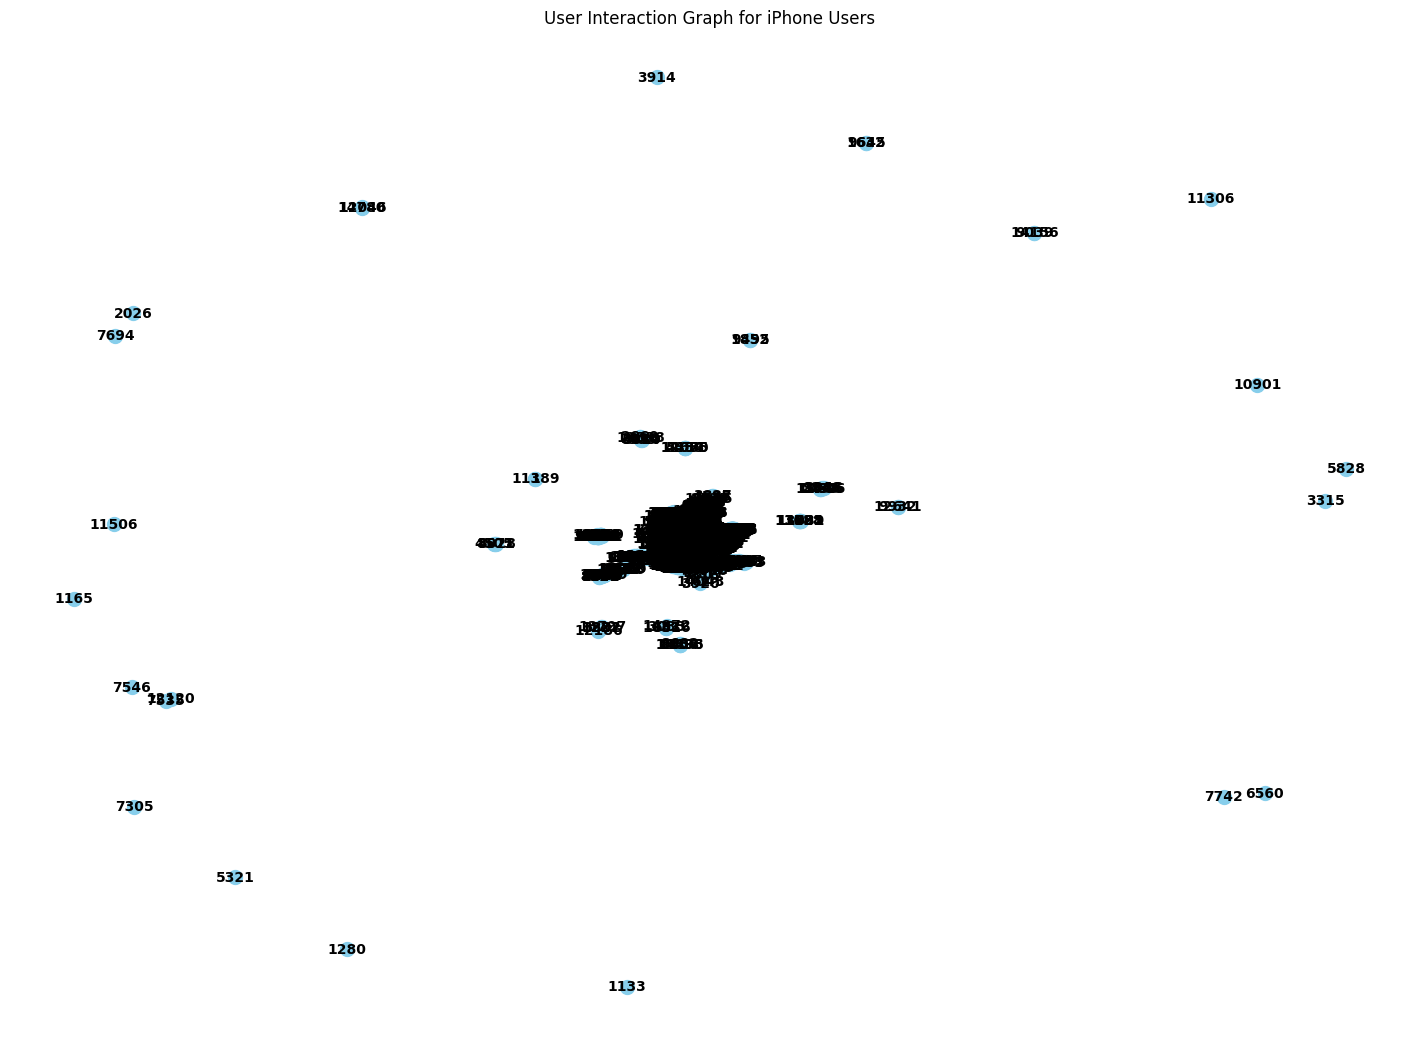

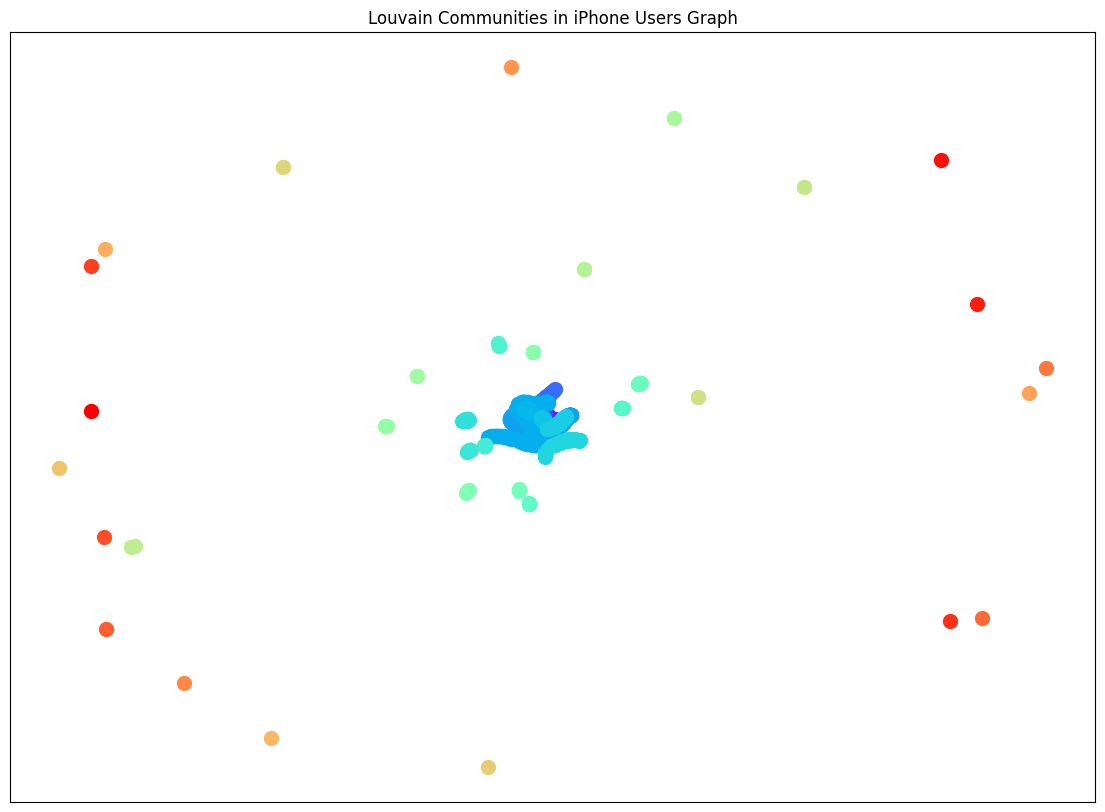

[[38,
  69,
  103,
  189,
  211,
  263,
  276,
  350,
  422,
  444,
  466,
  505,
  515,
  518,
  526,
  551,
  554,
  564,
  584,
  619,
  644,
  699,
  735,
  764,
  880,
  887,
  916,
  927,
  932,
  954,
  998,
  1021,
  1022,
  1025,
  1043,
  1044,
  1051,
  1059,
  1079,
  1086,
  1098,
  1109,
  1150,
  1171,
  1184,
  1202,
  1228,
  1287,
  1311,
  1315,
  1329,
  1338,
  1377,
  1386,
  1400,
  1410,
  1414,
  1435,
  1523,
  1530,
  1538,
  1578,
  1597,
  1602,
  1634,
  1648,
  1657,
  1734,
  1745,
  1756,
  1768,
  1830,
  1841,
  1864,
  1878,
  1926,
  1954,
  1992,
  2005,
  2068,
  2136,
  2152,
  2183,
  2195,
  2298,
  2315,
  2373,
  2380,
  2390,
  2404,
  2412,
  2417,
  2426,
  2430,
  2449,
  2458,
  2542,
  2564,
  2611,
  2670,
  2676,
  2690,
  2726,
  2782,
  2794,
  2878,
  2885,
  2927,
  2936,
  2999,
  3069,
  3088,
  3104,
  3113,
  3131,
  3137,
  3143,
  3154,
  3222,
  3247,
  3257,
  3299,
  3336,
  3340,
  3353,
  3371,
  3372,
  3390,
  3397,
 

In [ ]:
# iPhone users
iphone_users_sample = dataset_cleaned[dataset_cleaned['device'] == 'iPhone']

# Define a function to create a graph
def create_graph(users, threshold_km):
    G = nx.Graph()
    for idx, row in users.iterrows():
        G.add_node(row['ID'], total_sessions=row['total_sessions'], activity_days=row['activity_days'],
                   driven_km_drives=row['driven_km_drives'], duration_minutes_drives=row['duration_minutes_drives'],
                   device=row['device'], label=row['label'])
    for i, row1 in users.iterrows():
        for j, row2 in users.iterrows():
            if i < j and abs(row1['driven_km_drives'] - row2['driven_km_drives']) < threshold_km:
                G.add_edge(row1['ID'], row2['ID'], weight=abs(row1['driven_km_drives'] - row2['driven_km_drives']))
    return G

# Create graph for iPhone users in the sample
threshold_km = 60
G_iphone_sample = create_graph(iphone_users_sample, threshold_km)

# Define a function to draw the graph
def draw_graph(G, title, node_color):
    plt.figure(figsize=(14, 10))  # Increase the figure size
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=100, node_color=node_color, font_size=10, font_weight='bold')  # Increase node size
    plt.title(title)
    plt.show()

# Draw the graph for iPhone users
draw_graph(G_iphone_sample, 'User Interaction Graph for iPhone Users', 'skyblue')


# Function to detect communities using the Louvain algorithm
def detect_louvain_communities(G):
    # Using the Louvain method to find communities
    partition = community_louvain.best_partition(G)
    # Group nodes by community
    communities = {}
    for node, community_id in partition.items():
        if community_id not in communities:
            communities[community_id] = []
        communities[community_id].append(node)
    sorted_communities = sorted(communities.values(), key=len, reverse=True)
    return sorted_communities

# Detect communities in the iPhone users graph using Louvain
iphone_louvain_communities = detect_louvain_communities(G_iphone_sample)

# Function to draw communities using Louvain
def draw_louvain_communities(G, communities, title):
    plt.figure(figsize=(14, 10))  # Increase the figure size
    pos = nx.spring_layout(G, seed=42)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))
    for community, color in zip(communities, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[color], label=community, node_size=100)  # Increase node size
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title(title)
    plt.show()

# Draw communities for iPhone users using Louvain
draw_louvain_communities(G_iphone_sample, iphone_louvain_communities, 'Louvain Communities in iPhone Users Graph')

iphone_louvain_communities


In [7]:

# iPhone users
iphone_users_sample = dataset_cleaned[dataset_cleaned['device'] == 'iPhone']

# Define a function to create a graph
def create_graph(users, threshold_km):
    G = nx.Graph()
    for idx, row in users.iterrows():
        G.add_node(row['ID'], total_sessions=row['total_sessions'], activity_days=row['activity_days'],
                   driven_km_drives=row['driven_km_drives'], duration_minutes_drives=row['duration_minutes_drives'],
                   device=row['device'], label=row['label'])
    for i, row1 in users.iterrows():
        for j, row2 in users.iterrows():
            if i < j and abs(row1['driven_km_drives'] - row2['driven_km_drives']) < threshold_km:
                G.add_edge(row1['ID'], row2['ID'], weight=abs(row1['driven_km_drives'] - row2['driven_km_drives']))
    return G

# Create graph for iPhone users
threshold_km = 60
G_iphone_sample = create_graph(iphone_users_sample, threshold_km)

Top 10 users by degree centrality: [(1302, 0.028553820870994246), (2882, 0.028553820870994246), (335, 0.028348397699260477), (1134, 0.028348397699260477), (4696, 0.028348397699260477), (4998, 0.028348397699260477), (5073, 0.028348397699260477), (5624, 0.028348397699260477), (9182, 0.028348397699260477), (11010, 0.028348397699260477)]
Top 10 users by betweenness centrality: [(3047, 0.14016498238056313), (2582, 0.13404068088591936), (10020, 0.1251826358679467), (12699, 0.12349200528688241), (9134, 0.12297607800149306), (14197, 0.12243290604497965), (9507, 0.09878493957426136), (8563, 0.09728296068847539), (876, 0.09201230850772753), (365, 0.09010414382809945)]
Top 10 users by closeness centrality: [(9998, 0.033453200799952364), (10236, 0.033453200799952364), (13610, 0.0334517348937643), (7204, 0.03342780993211853), (8100, 0.03342780993211853), (4225, 0.033426590188346005), (14578, 0.033426590188346005), (2405, 0.03342512661331259), (8161, 0.033423907065351297), (12589, 0.0334239070653512

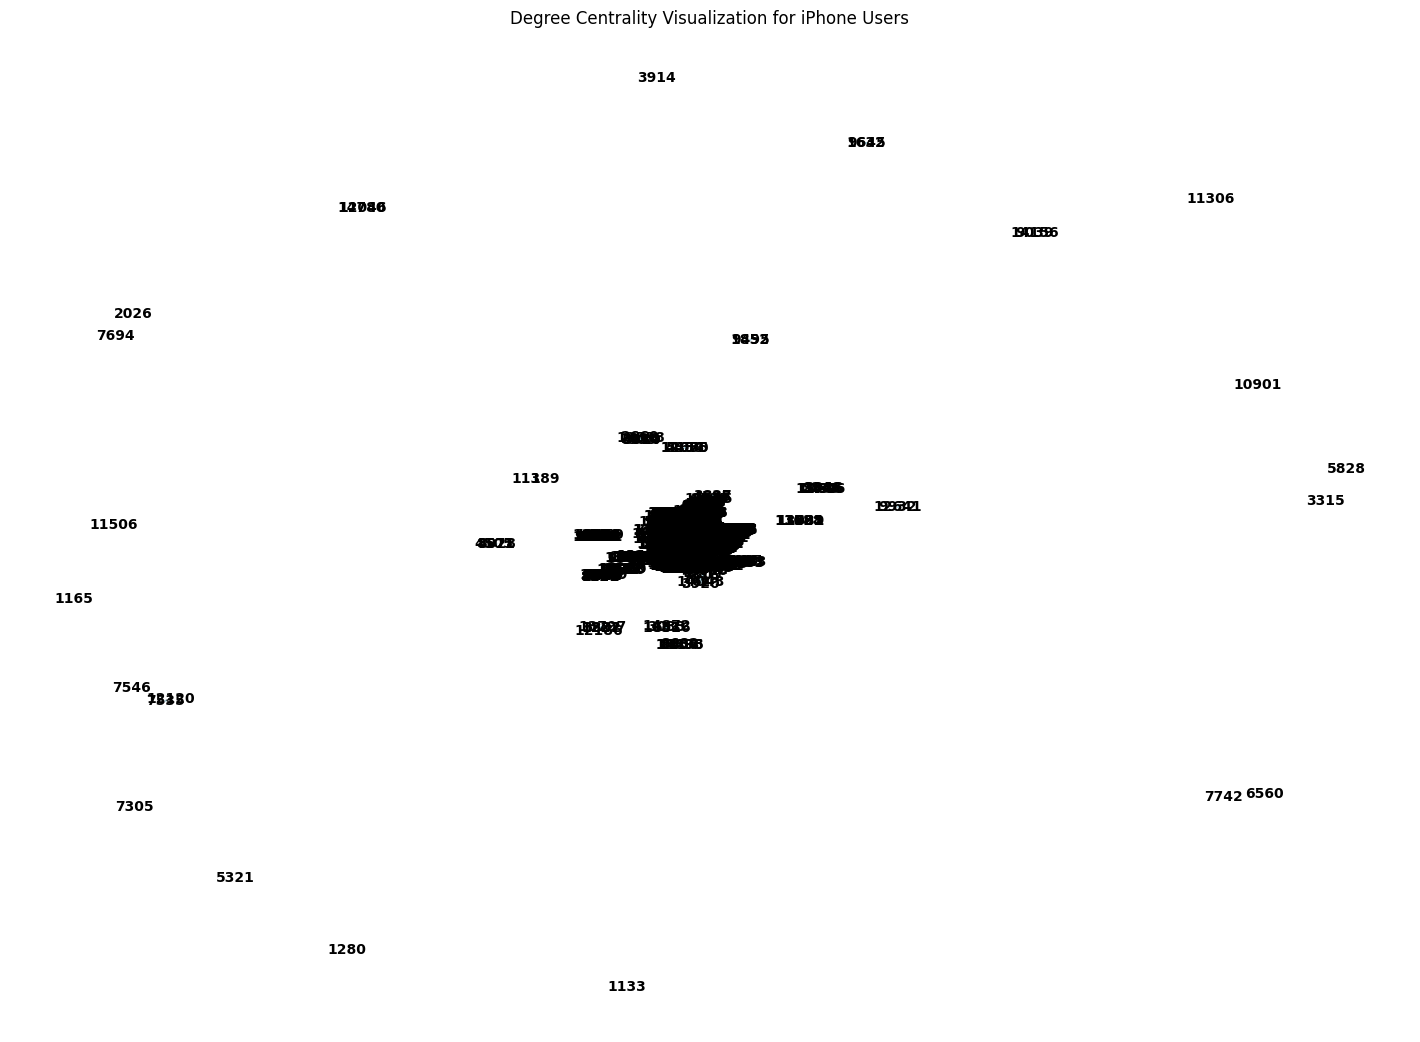

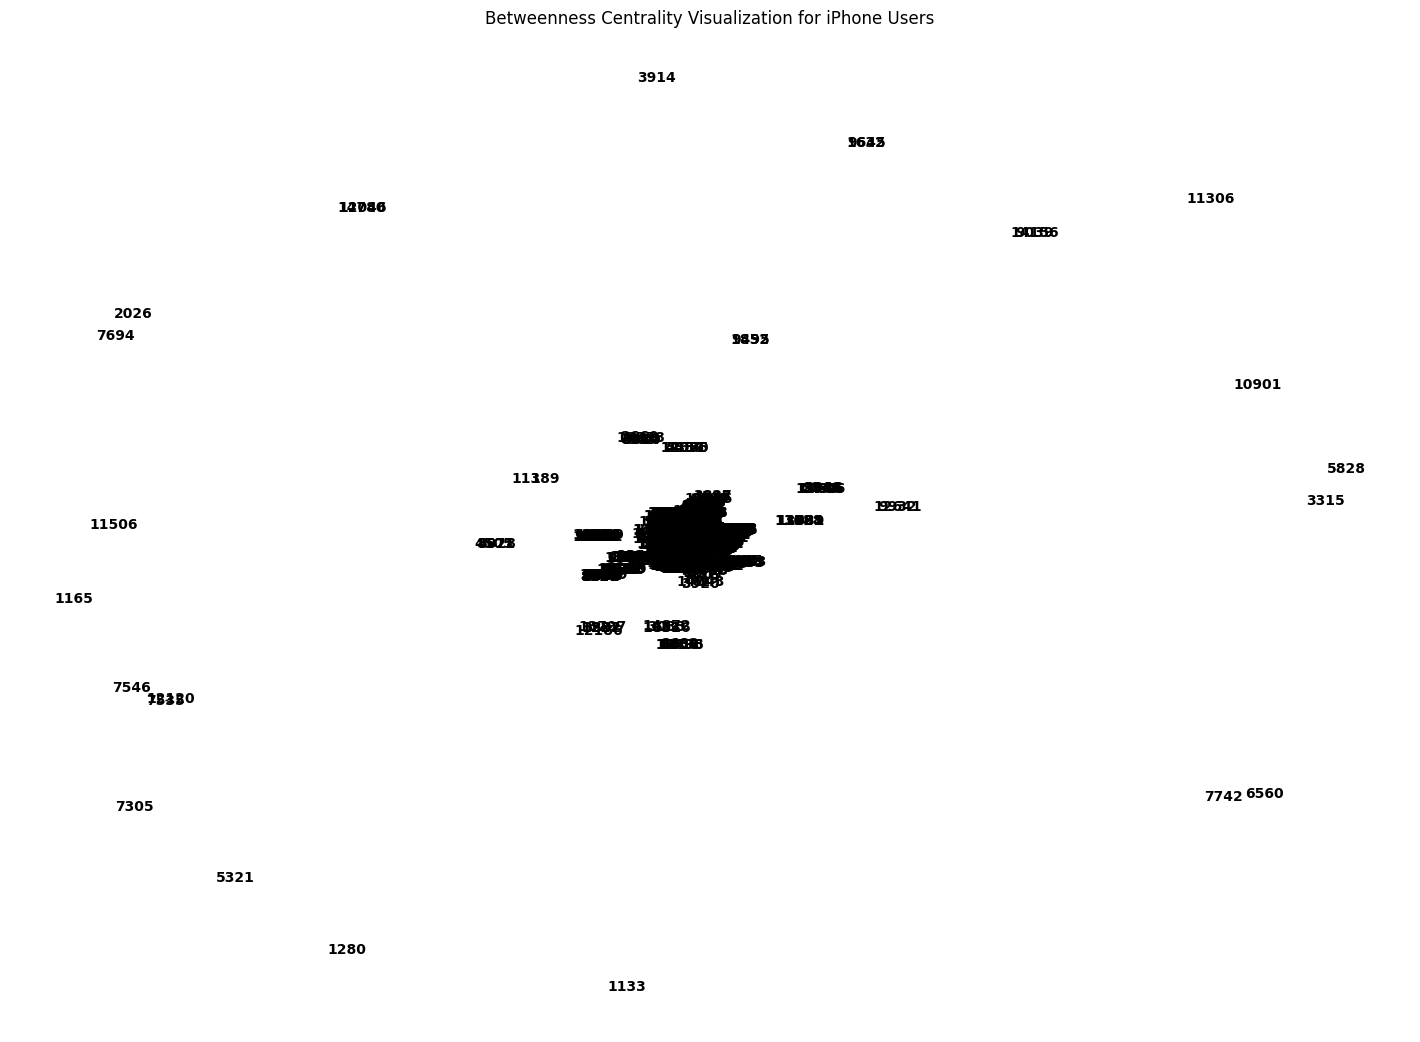

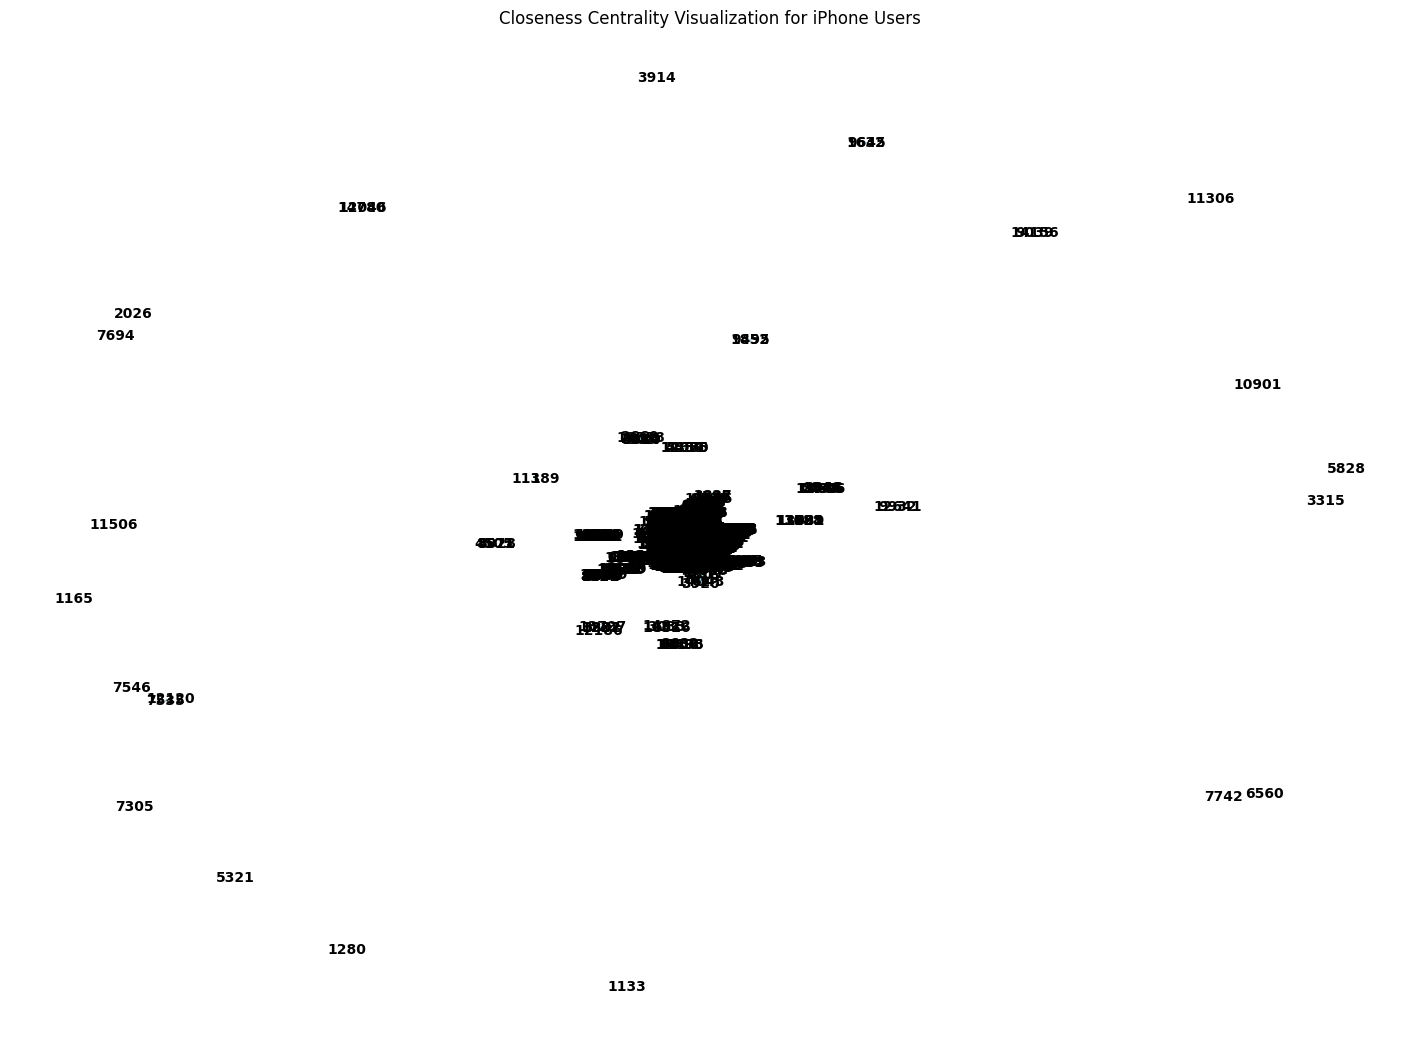

In [8]:
# Calculate centrality measures for iPhone users graph
degree_centrality_iphone = nx.degree_centrality(G_iphone_sample)
betweenness_centrality_iphone = nx.betweenness_centrality(G_iphone_sample)
closeness_centrality_iphone = nx.closeness_centrality(G_iphone_sample)

# Display top 10 users for each centrality measure
top_10_degree_iphone = sorted(degree_centrality_iphone.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_betweenness_iphone = sorted(betweenness_centrality_iphone.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_closeness_iphone = sorted(closeness_centrality_iphone.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 users by degree centrality:", top_10_degree_iphone)
print("Top 10 users by betweenness centrality:", top_10_betweenness_iphone)
print("Top 10 users by closeness centrality:", top_10_closeness_iphone)

# Draw graph with centrality visualization
def draw_centrality_graph(G, centrality, title):
    pos = nx.spring_layout(G, seed=42)
    node_size = [v * 1000 for v in centrality.values()]
    plt.figure(figsize=(14, 10))
    nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title(title)
    plt.show()

draw_centrality_graph(G_iphone_sample, degree_centrality_iphone, 'Degree Centrality Visualization for iPhone Users')
draw_centrality_graph(G_iphone_sample, betweenness_centrality_iphone, 'Betweenness Centrality Visualization for iPhone Users')
draw_centrality_graph(G_iphone_sample, closeness_centrality_iphone, 'Closeness Centrality Visualization for iPhone Users')

<ipython-input-9-111b6d3cebae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['activity_hours'] = dataframe['activity_days'] * 24
<ipython-input-9-111b6d3cebae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['activity_hours'] = dataframe['activity_days'] * 24
<ipython-input-9-111b6d3cebae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

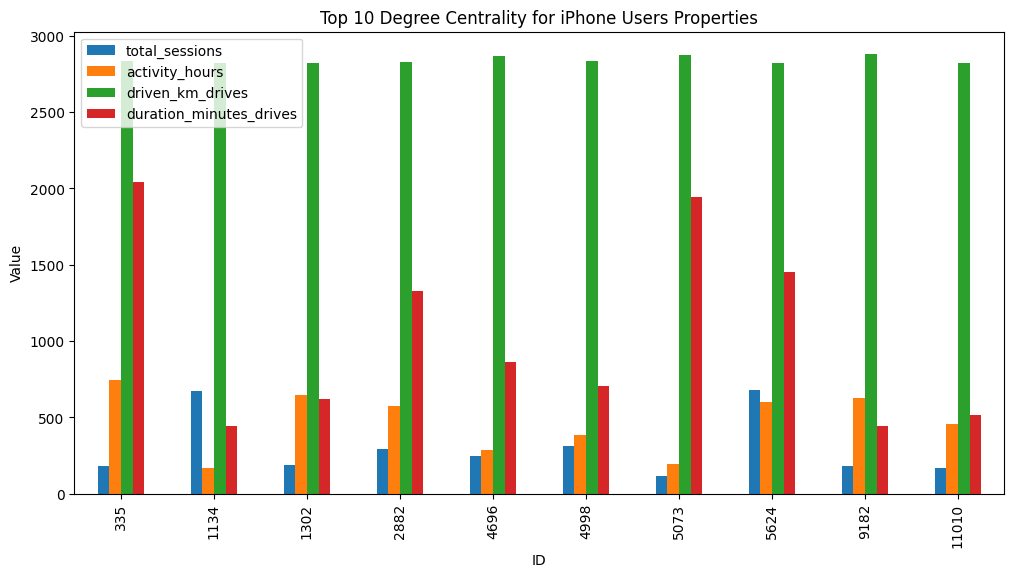

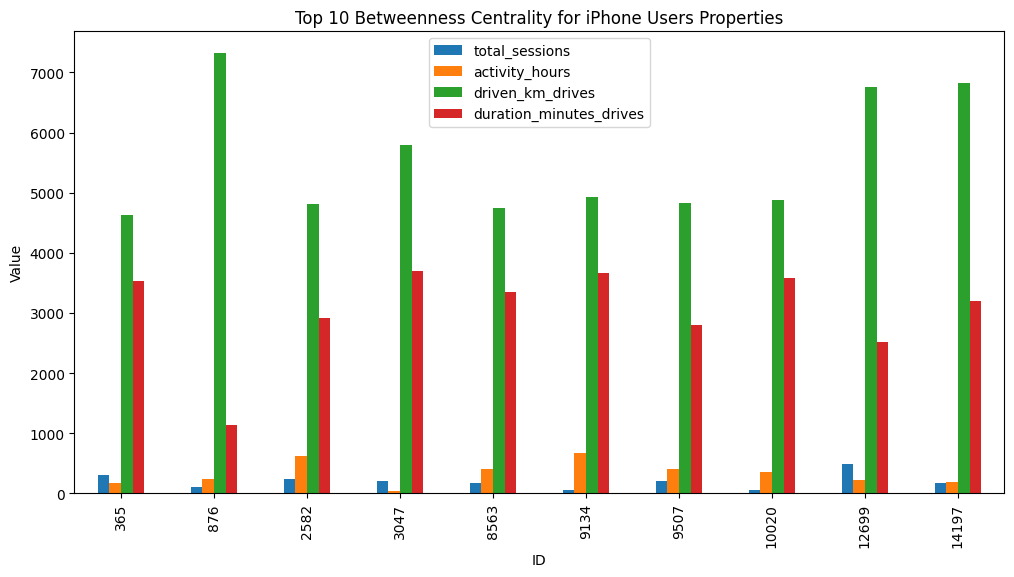

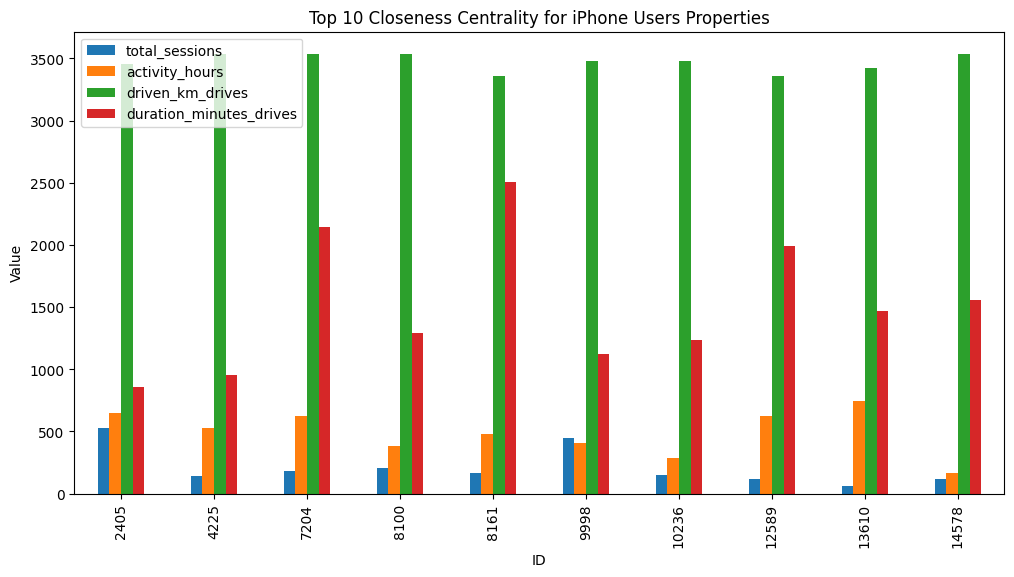

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to extract and display properties of top users
def extract_properties(dataset, top_users):
    top_users_data = dataset[dataset['ID'].isin([user[0] for user in top_users])]
    return top_users_data

# Convert activity_days to activity_hours
def convert_activity_days_to_hours(dataframe):
    dataframe['activity_hours'] = dataframe['activity_days'] * 24
    return dataframe

# Extract properties for top users by each centrality measure
top_degree_properties = extract_properties(iphone_users_sample, top_10_degree_iphone)
top_betweenness_properties = extract_properties(iphone_users_sample, top_10_betweenness_iphone)
top_closeness_properties = extract_properties(iphone_users_sample, top_10_closeness_iphone)

# Convert activity_days to activity_hours for visualization
top_degree_properties = convert_activity_days_to_hours(top_degree_properties)
top_betweenness_properties = convert_activity_days_to_hours(top_betweenness_properties)
top_closeness_properties = convert_activity_days_to_hours(top_closeness_properties)

# Visualize the properties of top users for each centrality measure
def plot_user_properties(properties, title):
    properties.plot(kind='bar', x='ID', y=['total_sessions', 'activity_hours', 'driven_km_drives', 'duration_minutes_drives'], figsize=(12, 6), title=title)
    plt.ylabel('Value')
    plt.show()

# Plot properties for top users by each centrality measure
plot_user_properties(top_degree_properties[['ID', 'total_sessions', 'activity_hours', 'driven_km_drives', 'duration_minutes_drives']], 'Top 10 Degree Centrality for iPhone Users Properties')
plot_user_properties(top_betweenness_properties[['ID', 'total_sessions', 'activity_hours', 'driven_km_drives', 'duration_minutes_drives']], 'Top 10 Betweenness Centrality for iPhone Users Properties')
plot_user_properties(top_closeness_properties[['ID', 'total_sessions', 'activity_hours', 'driven_km_drives', 'duration_minutes_drives']], 'Top 10 Closeness Centrality for iPhone Users Properties')


In [ ]:
# Function to detect communities using the Girvan-Newman algorithm
def detect_communities(G):
    communities = nx.community.girvan_newman(G)
    top_level_communities = next(communities)
    sorted_communities = sorted(map(sorted, top_level_communities))
    return sorted_communities

# Detect communities in the iPhone users graph
iphone_communities = detect_communities(G_iphone_sample)
print("Communities in iPhone users graph:", iphone_communities)

# Function to draw communities
def draw_communities(G, communities, title):
    plt.figure(figsize=(14, 10))  # Increase the figure size
    pos = nx.spring_layout(G, seed=42)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))
    for community, color in zip(communities, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[color], label=community, node_size=100)  # Increase node size
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title(title)
    plt.show()

# Draw communities for iPhone users
draw_communities(G_iphone_sample, iphone_communities, 'Communities in iPhone Users Graph')

KeyboardInterrupt: 

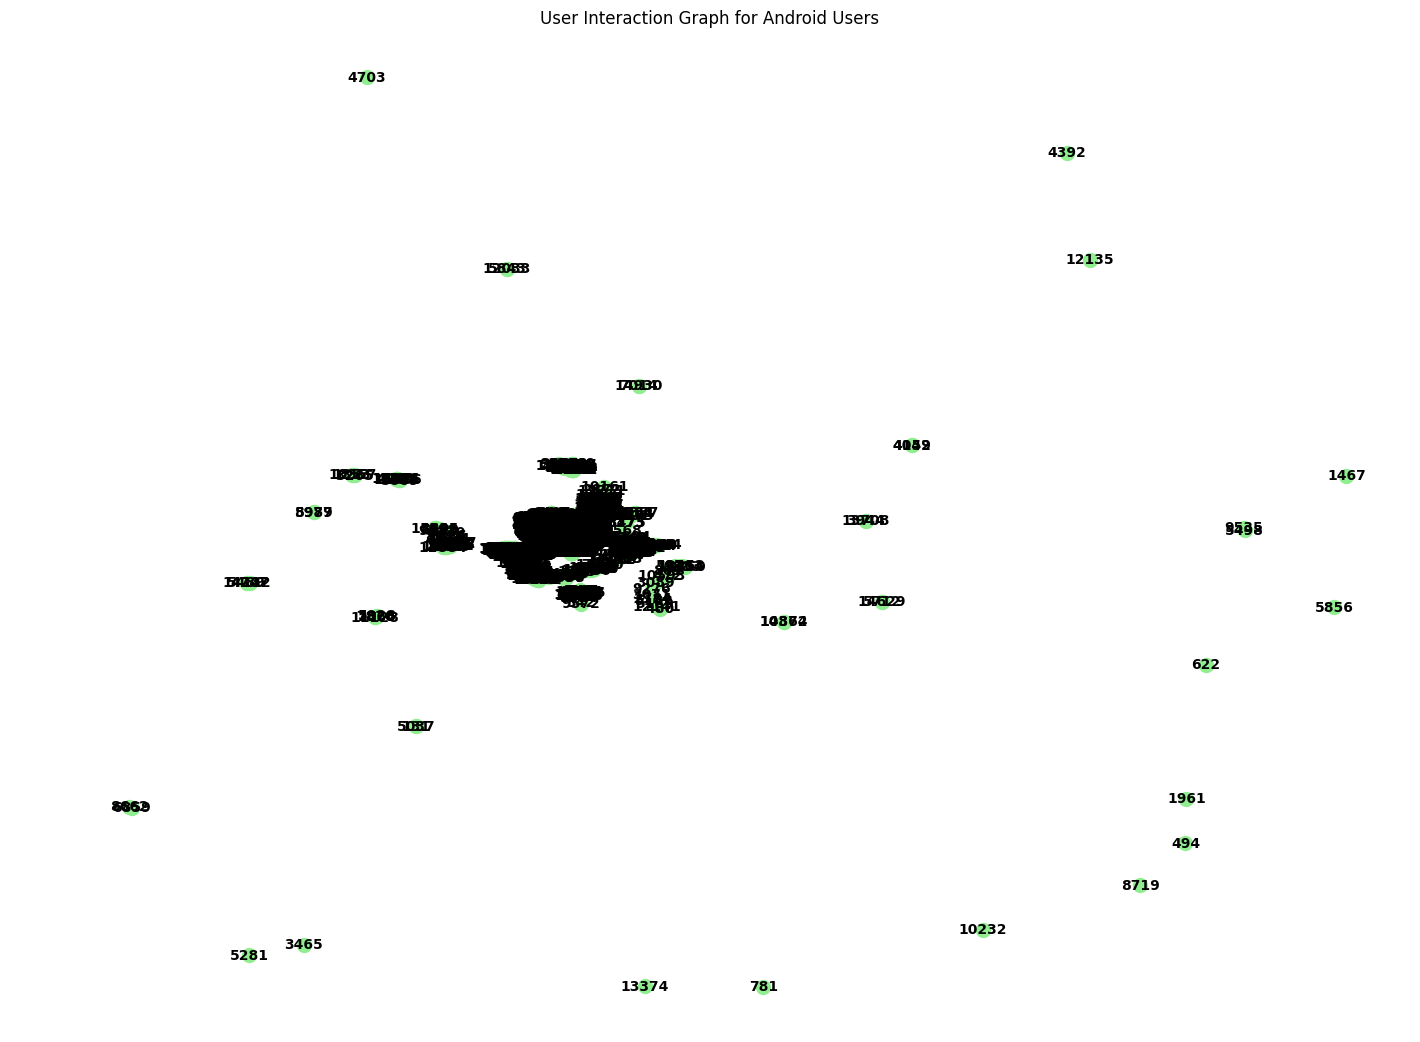

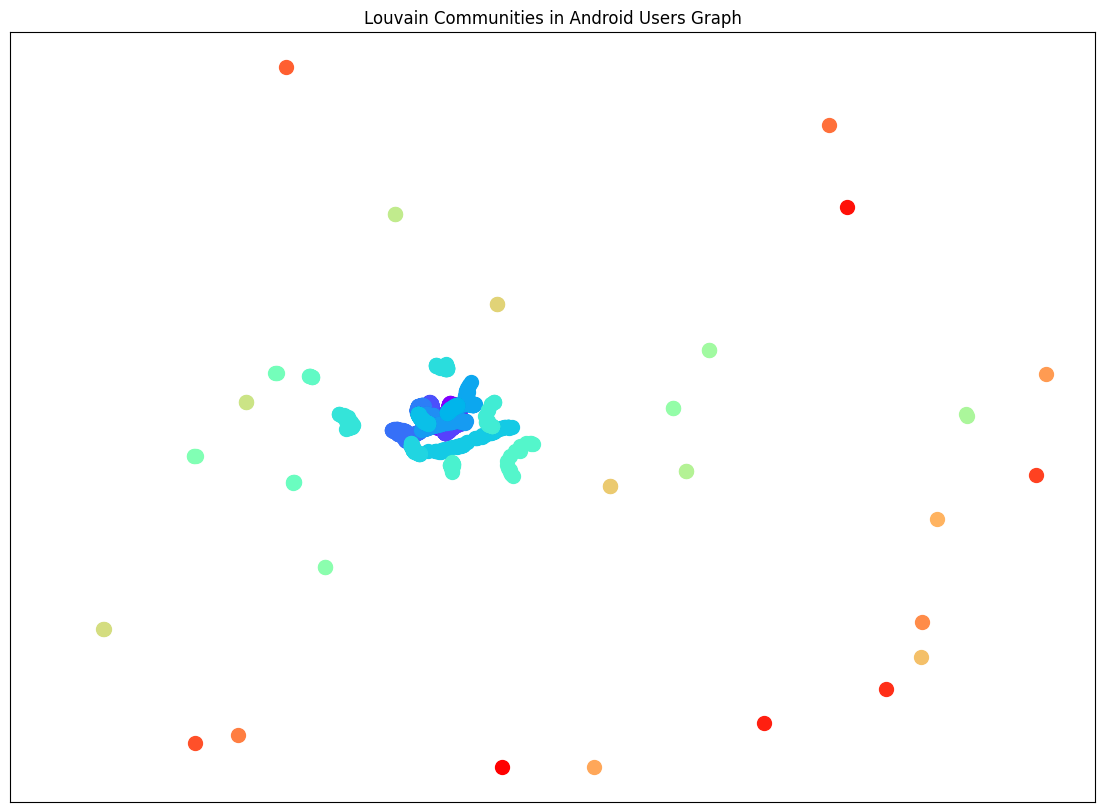

[[42,
  43,
  79,
  117,
  124,
  137,
  254,
  337,
  424,
  441,
  579,
  594,
  646,
  682,
  691,
  700,
  775,
  798,
  863,
  938,
  940,
  979,
  1014,
  1087,
  1129,
  1336,
  1396,
  1466,
  1562,
  1619,
  1696,
  1764,
  1770,
  1987,
  2084,
  2423,
  2450,
  2501,
  2506,
  2509,
  2691,
  2730,
  2815,
  2854,
  3127,
  3133,
  3152,
  3268,
  3273,
  3362,
  3540,
  3594,
  3648,
  3665,
  3706,
  3843,
  3854,
  3906,
  3919,
  3927,
  3949,
  4091,
  4207,
  4213,
  4268,
  4292,
  4371,
  4425,
  4435,
  4549,
  4624,
  4628,
  4795,
  4807,
  4870,
  4940,
  4957,
  4986,
  5114,
  5166,
  5211,
  5212,
  5255,
  5297,
  5325,
  5348,
  5410,
  5422,
  5439,
  5446,
  5470,
  5512,
  5520,
  5538,
  5686,
  5832,
  5882,
  5923,
  5927,
  6147,
  6343,
  6411,
  6481,
  6502,
  6527,
  6627,
  6772,
  6829,
  6845,
  6865,
  6913,
  6925,
  7041,
  7043,
  7140,
  7154,
  7164,
  7308,
  7445,
  7608,
  7741,
  7790,
  7809,
  7846,
  7916,
  7971,
  8004,
  8020,
 

In [ ]:
# Android users- threshold_km of 60
android_users_sample = dataset_cleaned[dataset_cleaned['device'] == 'Android']

# Define a function to create a graph
def create_graph(users, threshold_km):
    G = nx.Graph()
    for idx, row in users.iterrows():
        G.add_node(row['ID'], total_sessions=row['total_sessions'], activity_days=row['activity_days'],
                   driven_km_drives=row['driven_km_drives'], duration_minutes_drives=row['duration_minutes_drives'],
                   device=row['device'], label=row['label'])
    for i, row1 in users.iterrows():
        for j, row2 in users.iterrows():
            if i < j and abs(row1['driven_km_drives'] - row2['driven_km_drives']) < threshold_km:
                G.add_edge(row1['ID'], row2['ID'], weight=abs(row1['driven_km_drives'] - row2['driven_km_drives']))
    return G

# Create graphs for Android users
threshold_km = 60
G_android_sample = create_graph(android_users_sample, threshold_km)

# Define a function to draw the graph
def draw_graph(G, title, node_color):
    plt.figure(figsize=(14, 10))  # Increase the figure size
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=100, node_color=node_color, font_size=10, font_weight='bold')  # Increase node size
    plt.title(title)
    plt.show()

# Draw the graph for Android users
draw_graph(G_android_sample, 'User Interaction Graph for Android Users', 'lightgreen')

# Function to detect communities using the Louvain algorithm
def detect_louvain_communities(G):
    # Using the Louvain method to find communities
    partition = community_louvain.best_partition(G)
    # Group nodes by community
    communities = {}
    for node, community_id in partition.items():
        if community_id not in communities:
            communities[community_id] = []
        communities[community_id].append(node)
    sorted_communities = sorted(communities.values(), key=len, reverse=True)
    return sorted_communities

# Detect communities in the Android users graph using Louvain
android_louvain_communities = detect_louvain_communities(G_android_sample)

# Function to draw communities using Louvain
def draw_louvain_communities(G, communities, title):
    plt.figure(figsize=(14, 10))  # Increase the figure size
    pos = nx.spring_layout(G, seed=42)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))
    for community, color in zip(communities, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[color], label=community, node_size=100)  # Increase node size
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title(title)
    plt.show()

# Draw communities for Android users using Louvain
draw_louvain_communities(G_android_sample, android_louvain_communities, 'Louvain Communities in Android Users Graph')

android_louvain_communities

In [ ]:

# Function to detect communities using the Girvan-Newman algorithm
def detect_communities(G):
    communities = nx.community.girvan_newman(G)
    top_level_communities = next(communities)
    sorted_communities = sorted(map(sorted, top_level_communities))
    return sorted_communities

# Detect communities in the Android users graph
android_communities = detect_communities(G_android_sample)
print("Communities in Android users graph:", android_communities)

# Function to draw communities
def draw_communities(G, communities, title):
    plt.figure(figsize=(14, 10))  # Increase the figure size
    pos = nx.spring_layout(G, seed=42)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))
    for community, color in zip(communities, colors):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[color], label=community, node_size=100)  # Increase node size
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title(title)
    plt.show()

# Draw communities for Android users
draw_communities(G_android_sample, android_communities, 'Communities in Android Users Graph-Girvan-Newman algorithm')


In [10]:
# Android users- threshold_km of 60
android_users_sample = dataset_cleaned[dataset_cleaned['device'] == 'Android']

# Define a function to create a graph
def create_graph(users, threshold_km):
    G = nx.Graph()
    for idx, row in users.iterrows():
        G.add_node(row['ID'], total_sessions=row['total_sessions'], activity_days=row['activity_days'],
                   driven_km_drives=row['driven_km_drives'], duration_minutes_drives=row['duration_minutes_drives'],
                   device=row['device'], label=row['label'])
    for i, row1 in users.iterrows():
        for j, row2 in users.iterrows():
            if i < j and abs(row1['driven_km_drives'] - row2['driven_km_drives']) < threshold_km:
                G.add_edge(row1['ID'], row2['ID'], weight=abs(row1['driven_km_drives'] - row2['driven_km_drives']))
    return G

# Create graphs for Android users
threshold_km = 60
G_android_sample = create_graph(android_users_sample, threshold_km)


Top 10 users by degree centrality: [(104, 0.031411677753141166), (502, 0.031411677753141166), (1350, 0.031411677753141166), (2674, 0.031411677753141166), (5763, 0.031411677753141166), (10601, 0.031411677753141166), (0, 0.031042128603104215), (7783, 0.031042128603104215), (9165, 0.031042128603104215), (9940, 0.031042128603104215)]
Top 10 users by betweenness centrality: [(1576, 0.16042876652627588), (4273, 0.14768775018594094), (3160, 0.14156479633348326), (7691, 0.14060814750642026), (11396, 0.13087660733749712), (7325, 0.12904715686154117), (8687, 0.12574042892199824), (2815, 0.12566075640770605), (4957, 0.1250157943198493), (14871, 0.12319827331691473)]
Top 10 users by closeness centrality: [(2432, 0.035137924567848124), (14225, 0.03513582690654027), (168, 0.035129535425060046), (13316, 0.035129535425060046), (14228, 0.035129535425060046), (2900, 0.035110674492122886), (7988, 0.035110674492122886), (9174, 0.035110674492122886), (11333, 0.035110674492122886), (755, 0.03510596242295558

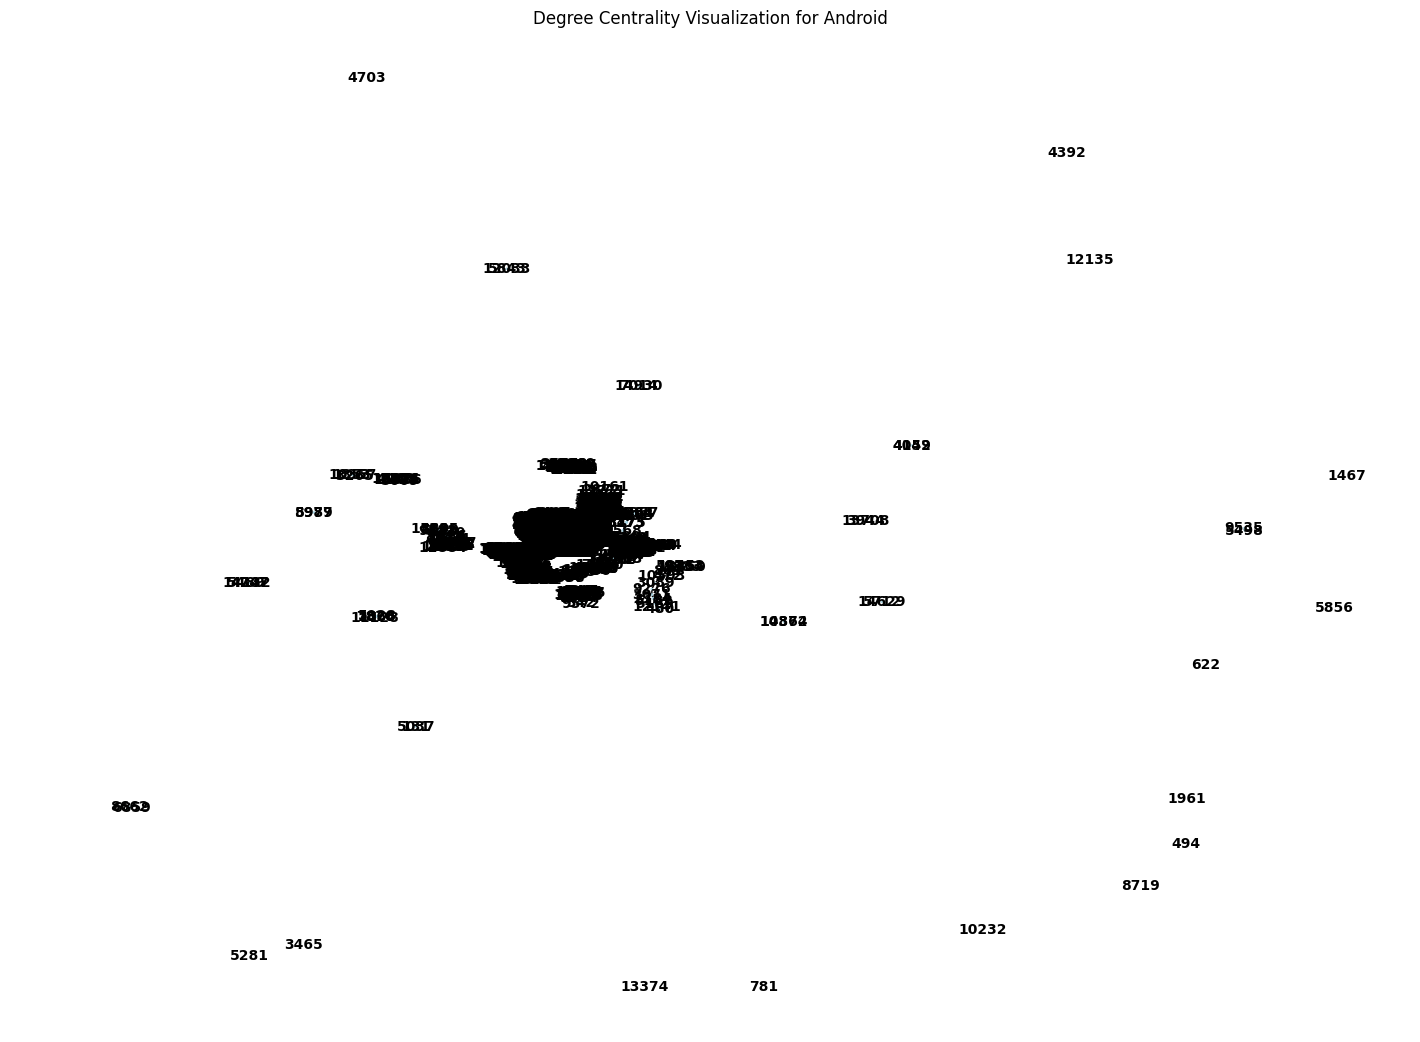

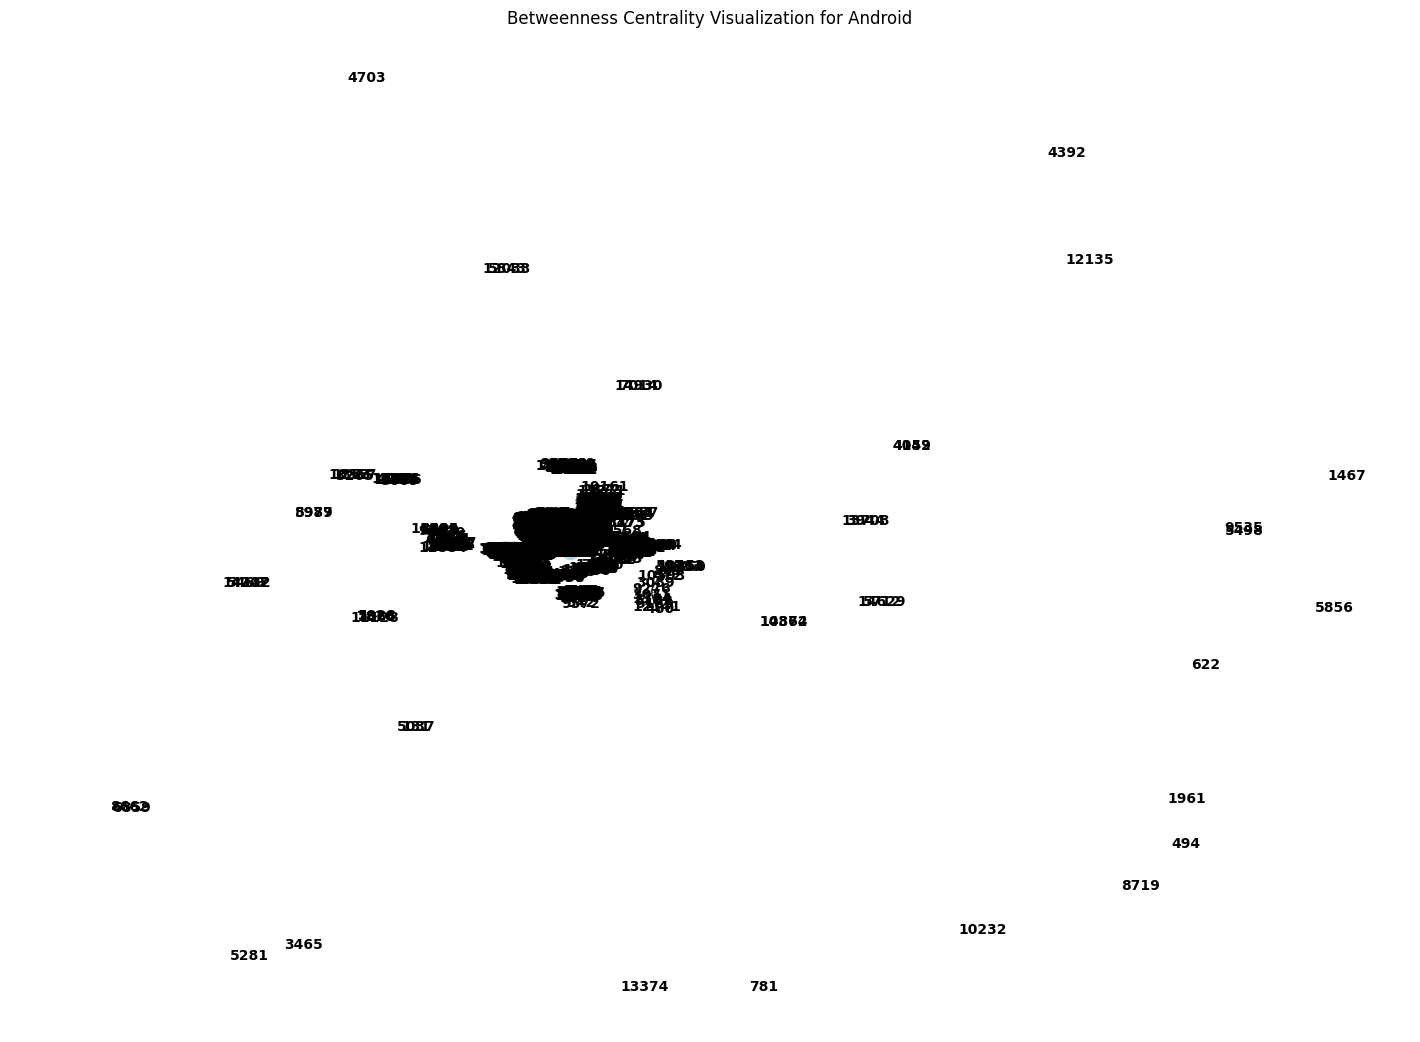

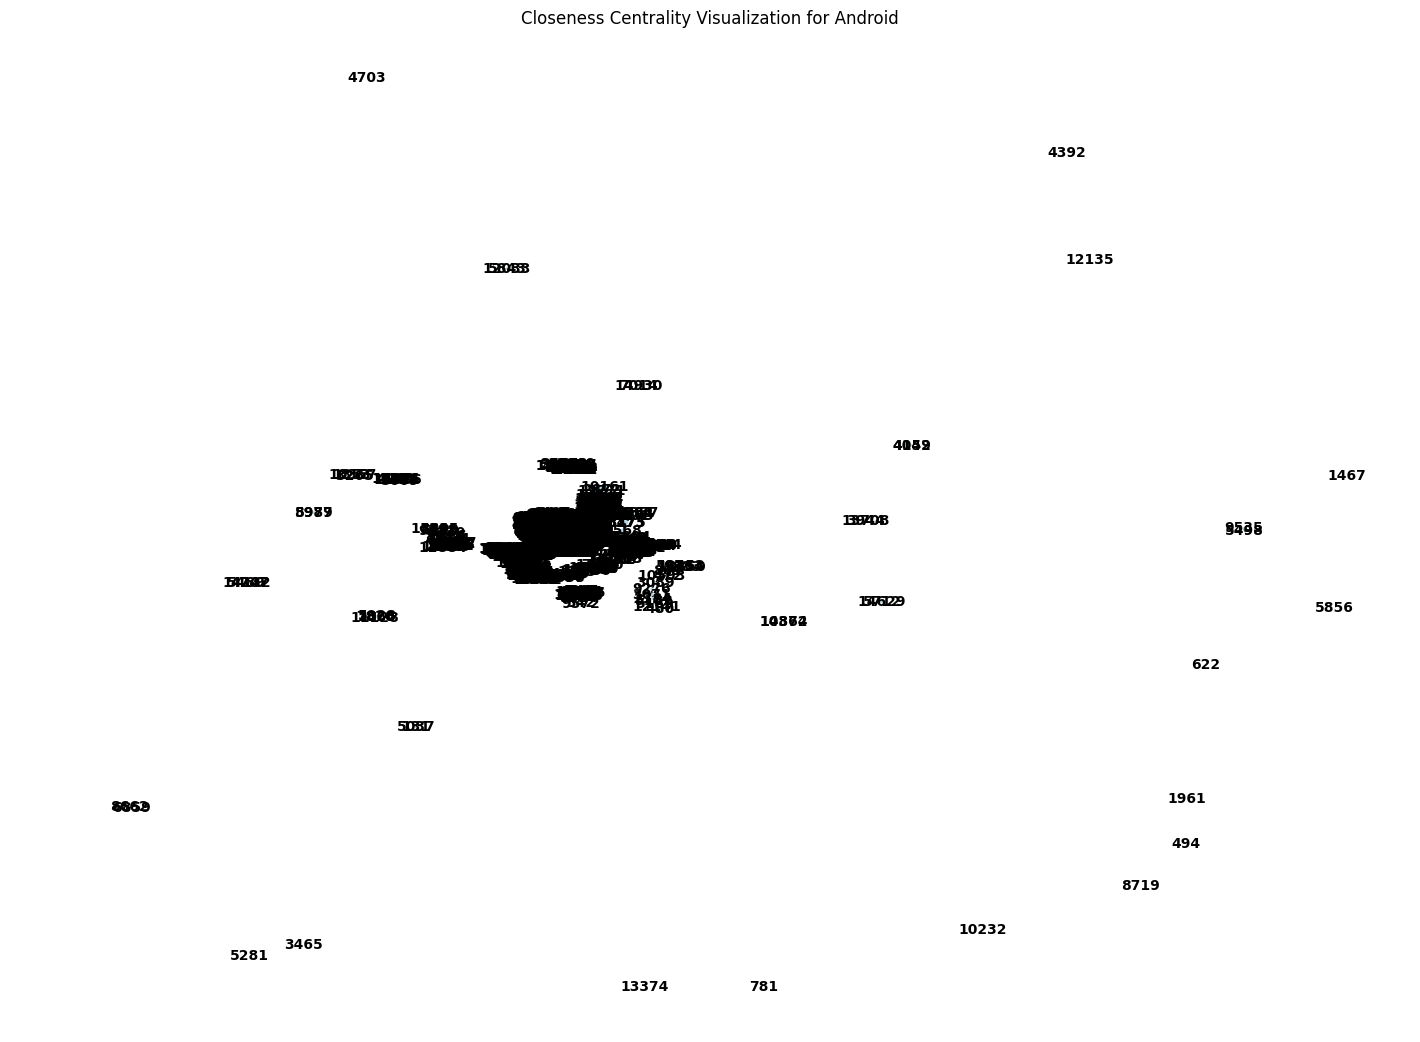

In [11]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G_android_sample)
betweenness_centrality = nx.betweenness_centrality(G_android_sample)
closeness_centrality = nx.closeness_centrality(G_android_sample)

# Display top 10 users for each centrality measure
top_10_degree_android = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_betweenness_android = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_closeness_android = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 users by degree centrality:", top_10_degree_android)
print("Top 10 users by betweenness centrality:", top_10_betweenness_android)
print("Top 10 users by closeness centrality:", top_10_closeness_android)


# Draw graph with centrality visualization
def draw_centrality_graph(G, centrality, title):
    pos = nx.spring_layout(G, seed=42)
    node_size = [v * 1000 for v in centrality.values()]
    plt.figure(figsize=(14, 10))
    nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title(title)
    plt.show()

draw_centrality_graph(G_android_sample, degree_centrality, 'Degree Centrality Visualization for Android')
draw_centrality_graph(G_android_sample, betweenness_centrality, 'Betweenness Centrality Visualization for Android')
draw_centrality_graph(G_android_sample, closeness_centrality, 'Closeness Centrality Visualization for Android')


<ipython-input-12-3a43e78a2f73>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['activity_hours'] = dataframe['activity_days'] * 24
<ipython-input-12-3a43e78a2f73>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['activity_hours'] = dataframe['activity_days'] * 24
<ipython-input-12-3a43e78a2f73>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

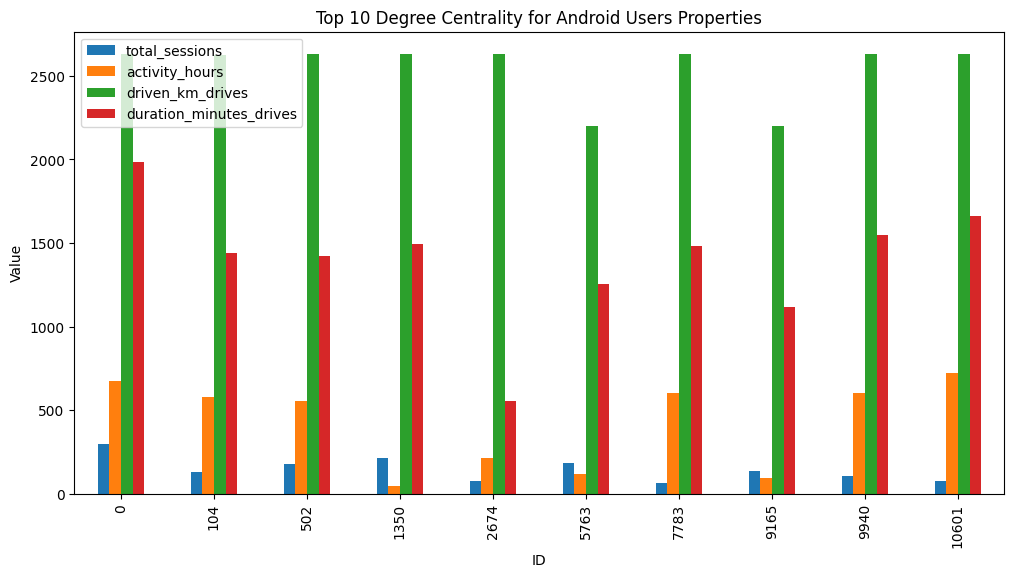

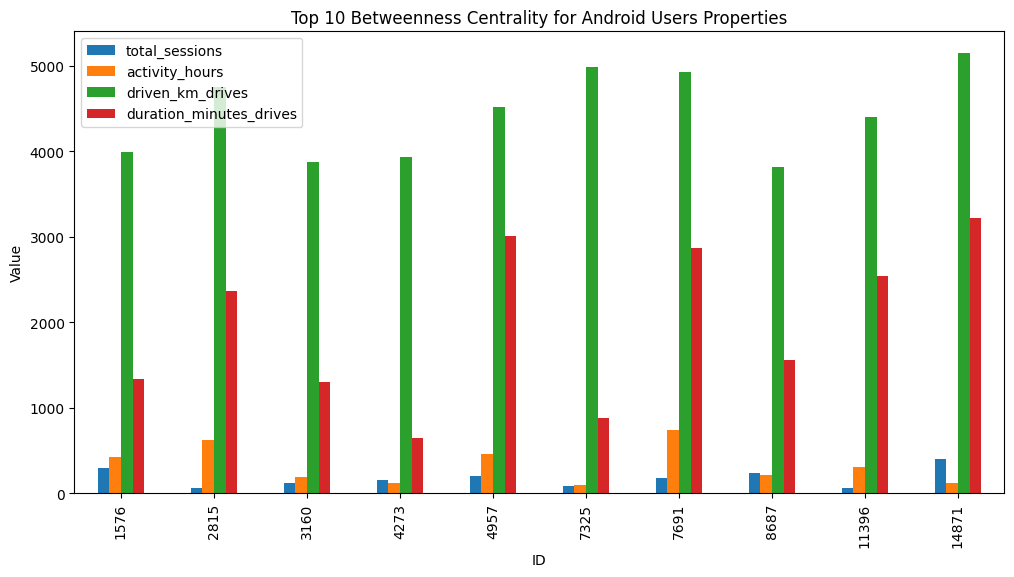

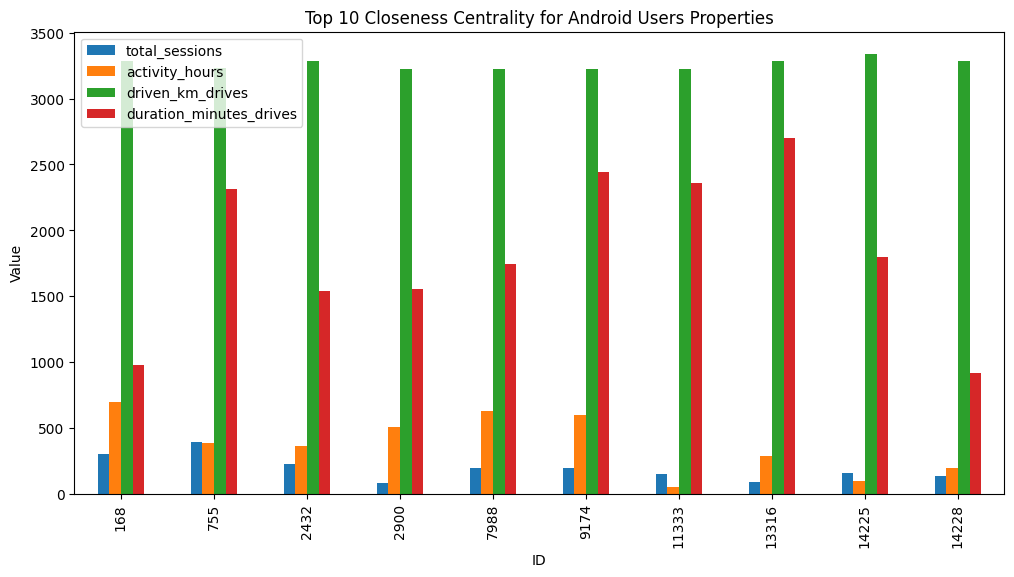

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to extract and display properties of top users
def extract_properties(dataset, top_users):
    top_users_data = dataset[dataset['ID'].isin([user[0] for user in top_users])]
    return top_users_data

# Convert activity_days to activity_hours
def convert_activity_days_to_hours(dataframe):
    dataframe['activity_hours'] = dataframe['activity_days'] * 24
    return dataframe

# Extract properties for top users by each centrality measure
top_degree_properties = extract_properties(android_users_sample, top_10_degree_android)
top_betweenness_properties = extract_properties(android_users_sample, top_10_betweenness_android)
top_closeness_properties = extract_properties(android_users_sample, top_10_closeness_android)

# Convert activity_days to activity_hours for visualization
top_degree_properties = convert_activity_days_to_hours(top_degree_properties)
top_betweenness_properties = convert_activity_days_to_hours(top_betweenness_properties)
top_closeness_properties = convert_activity_days_to_hours(top_closeness_properties)

# Visualize the properties of top users for each centrality measure
def plot_user_properties(properties, title):
    properties.plot(kind='bar', x='ID', y=['total_sessions', 'activity_hours', 'driven_km_drives', 'duration_minutes_drives'], figsize=(12, 6), title=title)
    plt.ylabel('Value')
    plt.show()

# Plot properties for top users by each centrality measure
plot_user_properties(top_degree_properties[['ID', 'total_sessions', 'activity_hours', 'driven_km_drives', 'duration_minutes_drives']], 'Top 10 Degree Centrality for Android Users Properties')
plot_user_properties(top_betweenness_properties[['ID', 'total_sessions', 'activity_hours', 'driven_km_drives', 'duration_minutes_drives']], 'Top 10 Betweenness Centrality for Android Users Properties')
plot_user_properties(top_closeness_properties[['ID', 'total_sessions', 'activity_hours', 'driven_km_drives', 'duration_minutes_drives']], 'Top 10 Closeness Centrality for Android Users Properties')


# **Connected Components Analysis**

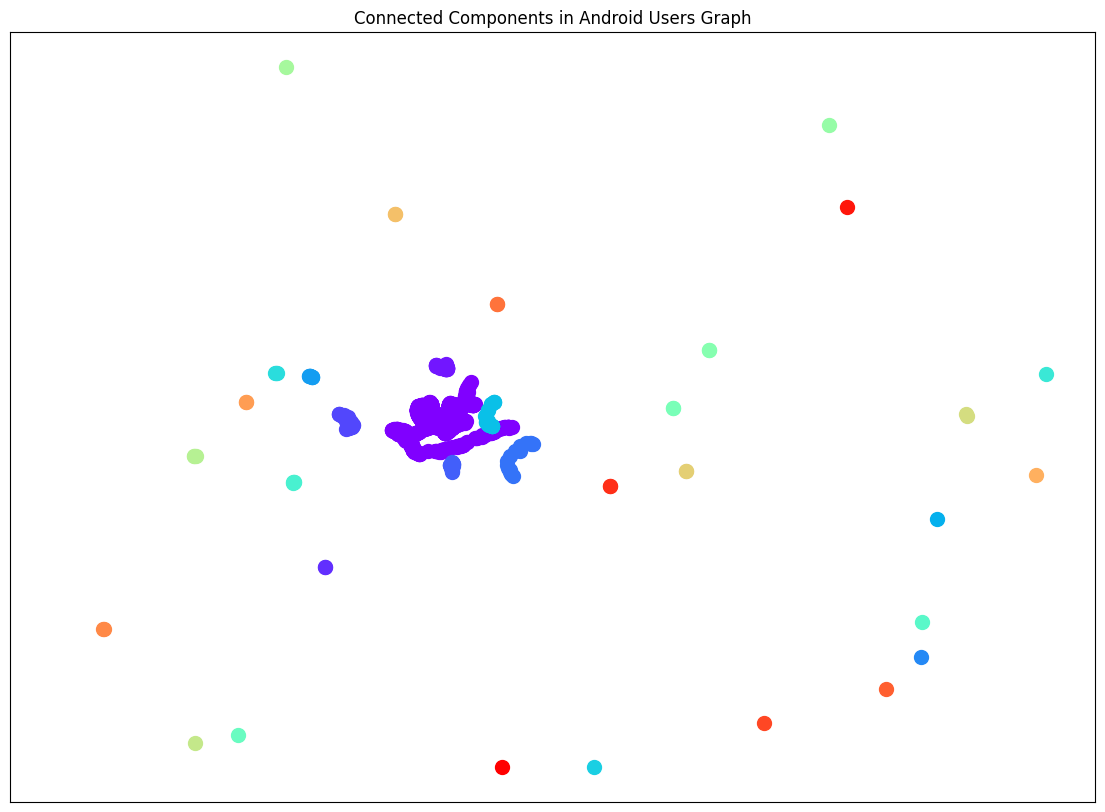

In [13]:

# Filter Android users
android_users_sample = dataset_cleaned[dataset_cleaned['device'] == 'Android']

# Define the function to create a graph
def create_graph(users, threshold_km):
    G = nx.Graph()
    for idx, row in users.iterrows():
        G.add_node(row['ID'], total_sessions=row['total_sessions'], activity_days=row['activity_days'],
                   driven_km_drives=row['driven_km_drives'], duration_minutes_drives=row['duration_minutes_drives'],
                   device=row['device'], label=row['label'])
    for i, row1 in users.iterrows():
        for j, row2 in users.iterrows():
            if i < j and abs(row1['driven_km_drives'] - row2['driven_km_drives']) < threshold_km:
                G.add_edge(row1['ID'], row2['ID'], weight=abs(row1['driven_km_drives'] - row2['driven_km_drives']))
    return G

# Create graph for Android users
threshold_km = 60
G_android_sample = create_graph(android_users_sample, threshold_km)

# Identify connected components
connected_components_android = list(nx.connected_components(G_android_sample))

# Visualize the connected components
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_android_sample, seed=42)
colors = plt.cm.rainbow(np.linspace(0, 1, len(connected_components_android)))
for component, color in zip(connected_components_android, colors):
    nx.draw_networkx_nodes(G_android_sample, pos, nodelist=component, node_color=[color], node_size=100)
nx.draw_networkx_edges(G_android_sample, pos, alpha=0.5)
plt.title("Connected Components in Android Users Graph")
plt.show()

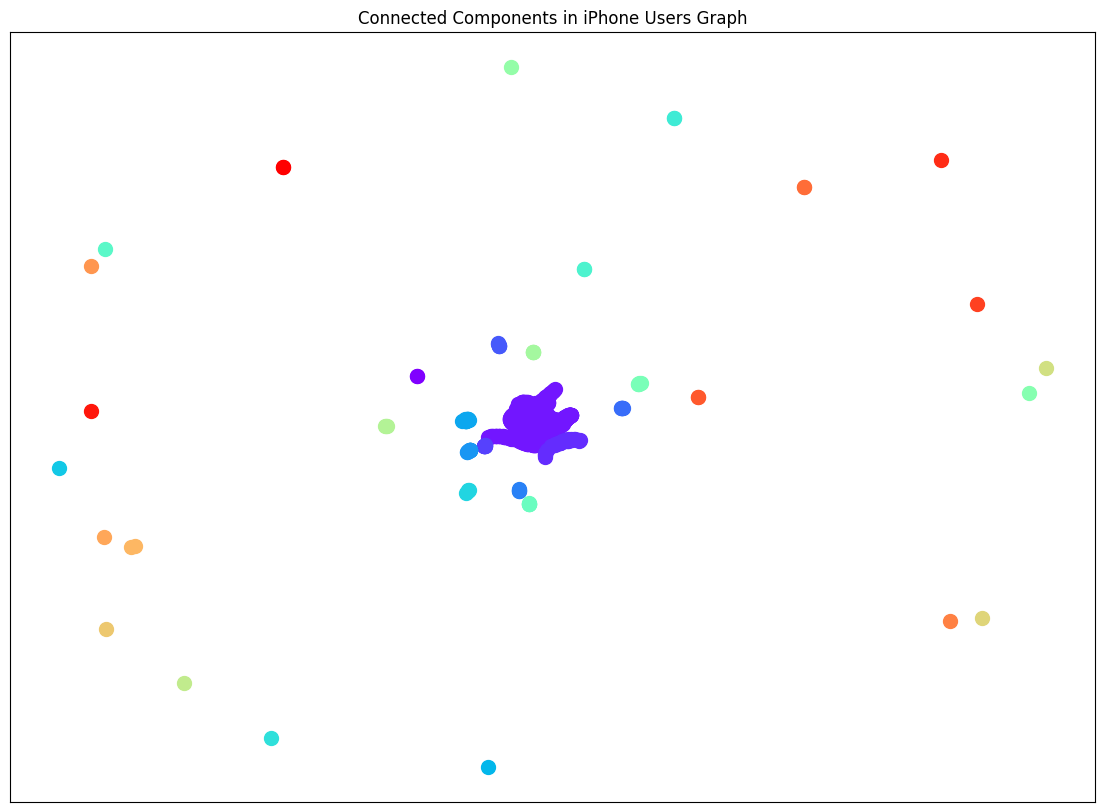

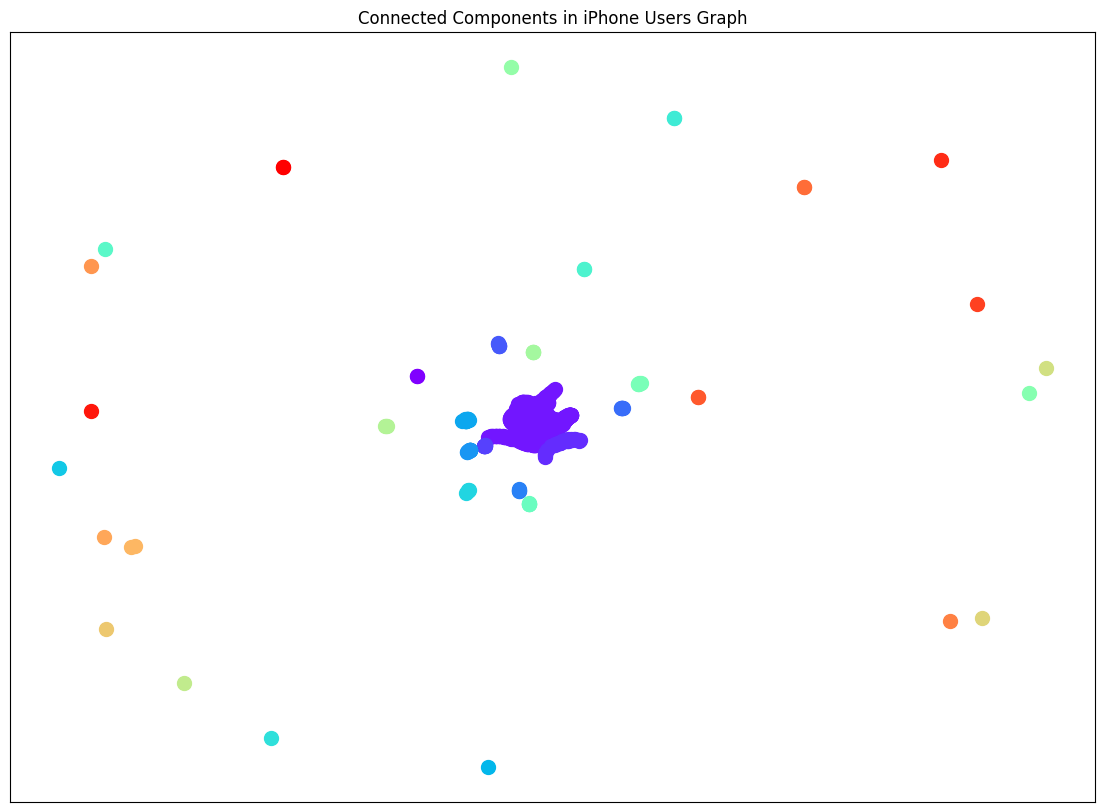

In [15]:
# Filter iPhone users
iphone_users_sample = dataset_cleaned[dataset_cleaned['device'] == 'iPhone']

# Define a function to create a graph
def create_graph(users, threshold_km):
    G = nx.Graph()
    for idx, row in users.iterrows():
        G.add_node(row['ID'], total_sessions=row['total_sessions'], activity_days=row['activity_days'],
                   driven_km_drives=row['driven_km_drives'], duration_minutes_drives=row['duration_minutes_drives'],
                   device=row['device'], label=row['label'])
    for i, row1 in users.iterrows():
        for j, row2 in users.iterrows():
            if i < j and abs(row1['driven_km_drives'] - row2['driven_km_drives']) < threshold_km:
                G.add_edge(row1['ID'], row2['ID'], weight=abs(row1['driven_km_drives'] - row2['driven_km_drives']))
    return G

# Create graph for iPhone users
threshold_km = 60
G_iphone_sample = create_graph(iphone_users_sample, threshold_km)

# Identify connected components
connected_components_iphone = list(nx.connected_components(G_iphone_sample))

# Visualize the connected components
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_iphone_sample, seed=42)
colors = plt.cm.rainbow(np.linspace(0, 1, len(connected_components_iphone)))
for component, color in zip(connected_components_iphone, colors):
    nx.draw_networkx_nodes(G_iphone_sample, pos, nodelist=component, node_color=[color], node_size=100)
nx.draw_networkx_edges(G_iphone_sample, pos, alpha=0.5)
plt.title("Connected Components in iPhone Users Graph")
plt.show()